# Example: Loading a Survival Probability Tensor

This file demonstrates how to use MUTE to load a survival probability tensor that exists in a file and plots it as a survival probability matrix.

If underground fluxes and intensities are being calculated, and a survival probability tensor object has not been passed to the calculation function, the loading of the tensor will be done automatically by MUTE (or one will be calculated if it is not already stored in a file). In order to check that the propagation of the muons and the calculation of the survival probabilities give the expected result, the ``mtp.load_survival_probability_tensor_from_file()`` function can be used.

## Import Packages

In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np

import mute.constants as mtc
import mute.propagation as mtp

## Set the Constants

In [2]:
mtc.set_verbose(2)
mtc.set_output(True)
mtc.set_lab("Example")
mtc.set_overburden("flat")
mtc.set_vertical_depth(1)
mtc.set_medium("rock")
mtc.set_density(2.65)
mtc.set_n_muon(100000)

## Load the Tensor from the File

The tensor can be loaded from a specific file by passing the ``file_name`` argument into the function. If no file name is given, the function will search through the data files for a file name that matches the set global propagation constants. With the constants set above, MUTE will look for a file in the ``"mute/data/survival_probabilities/"`` directory called ``rock_2.65_100000_Survival_Probabilities.txt``, where ``2.65`` is the density in gcm$^{-3}$, and ``100000`` is the number of muons, indicating the statistics of the file.

In [3]:
survival_probability_tensor = mtp.load_survival_probability_tensor_from_file()

Loading survival probabilities from data/survival_probabilities/rock_2.65_100000_Survival_Probabilities.txt.
Loaded survival probabilities.


The function can take a Boolean ``force`` parameter. If this parameter is set to ``True`` and the file containing the tensor does not already exist, MUTE will force muons to be propagated in order to calculate the required file (by running ``mtp.calc_survival_probability_tensor()``, which will call ``mtp.propagate_muons()``, based on the global constants set above). It will also create any directories it needs to store the file. If this parameter is not set, or if it is set to ``False``, and the file containing the tensor does not already exist, MUTE will prompt whether or not the propagation should be run (and whether any directories should be created). If any of the prompts are answered with anything other than ``y`` or ``Y``, the survival probabilities will not be calculated / written to the file. The survival probability tensor is always calculated for the default slant depths in ``mtc._SLANT_DEPTHS``.

## Plot the Survival Probability Matrix

The survival probability tensor is a three-dimensional NumPy array with the following axes:

1. Surface energy
2. Slant depth
3. Underground energy

The slant depth at index 4 of ``mtc._SLANT_DEPTHS`` is 3.0 km.w.e., so plot the survival probability matrix by indexing the tensor with ``[:, 4, :]``.

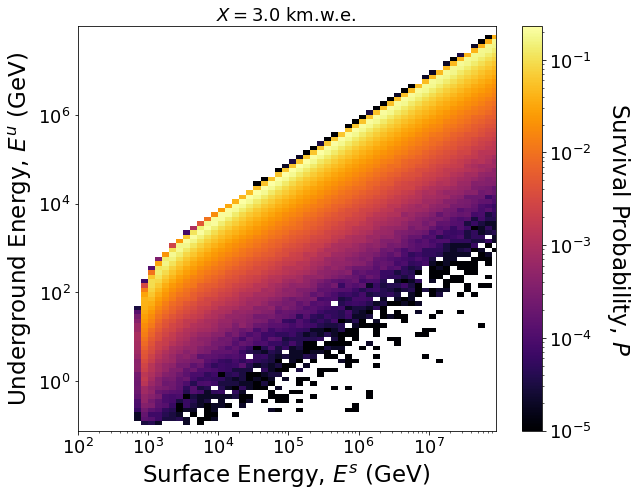

In [4]:
fig = plt.figure(figsize = (9, 7))
ax  = fig.add_subplot(111)

# Convert the energy grids from [MeV] to [GeV] for plotting

X, Y = np.meshgrid(mtc.ENERGIES/1e3, mtc.ENERGIES/1e3)

# Sum over the slant depths to plot against (surface energy grid, underground energy grid)

cbar = plt.colorbar(ax.pcolormesh(X, Y, survival_probability_tensor[:, 4, :].T, norm = LogNorm(), cmap = "inferno", shading = "auto"))
cbar.set_label("Survival Probability, $P$", fontsize = 23, rotation = 270, labelpad = 40)
cbar.ax.tick_params(axis = "both", which = "major", labelsize = 18)

ax.set_title(r"$X=${0} km.w.e.".format(mtc.slant_depths[4]), fontsize = 18)
ax.set_xlabel(r"Surface Energy, $E^s$ (GeV)", fontsize = 23)
ax.set_ylabel(r"Underground Energy, $E^u$ (GeV)", fontsize = 23)
ax.tick_params(axis = "both", which = "major", labelsize = 18)
ax.yaxis.offsetText.set_fontsize(16)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim([1e2, np.max(mtc.ENERGIES)/1e3])

plt.tight_layout()
plt.show()